# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering
In the cell below, I will gather **all** three pieces of data for this project and load them in the jupyter notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
import requests
import os

In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [5]:
df2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
import config
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
auth = OAuthHandler(config.consumer_key, config.consumer_secret)
auth.set_access_token(config.access_token, config.access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# df1 is a DataFrame with the twitter_archive_enhanced.csv file 
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
# A List of dictionary to read the tweet_json.txt file line by line into a pandas DataFrame
df_list = []
with open('tweet_json.txt', 'r', encoding='utf-8') as json_file:
    for tweet_id in json_file:
        tweet = json.loads(tweet_id)
        
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']

        # Append to list of dictionary
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': fav_count})
df3 = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [9]:
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33811
1,892177421306343426,5302,29330
2,891815181378084864,3481,22054
3,891689557279858688,7227,36939
4,891327558926688256,7762,35310


## Assessing Data
In this section, I will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. I will use **both** visual assessment and programmatic assessement to assess the data.

* I only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.

In [10]:
# check the summary info in the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
# checking the data type of the timestamp column
print(type(df1['timestamp'] [3]))

# checking for missing information in the expanded_urls column
print(sum(df1.expanded_urls.isnull()))

<class 'str'>
59


In [12]:
# checking the data types of doggo, floofer, pupper and puppo columns
print(type(df1['doggo'] [13]))
print(type(df1['floofer'] [14]))
print(type(df1['pupper'] [15]))
print(type(df1['puppo'] [16]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [13]:
# checking for null values in doggo, floofer, pupper and puppo columns
print(sum(df1.doggo.isnull()))
print(sum(df1.floofer.isnull()))
print(sum(df1.pupper.isnull()))
print(sum(df1.puppo.isnull()))

0
0
0
0


In [14]:
# checking for unique dog names in the name column
df1['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [15]:
# checking for missing values in name column
print(len(df1.loc[df1['name'] == 'None']))

# checking for dogs with no dog names
print(len(df1.loc[df1['name'] == 'a']))
print(len(df1.loc[df1['name'] == 'the']))
print(len(df1.loc[df1['name'] == 'an']))
print(len(df1.loc[df1['name'] == 'one']))
print(len(df1.loc[df1['name'] == 'actually']))
print(len(df1.loc[df1['name'] == 'old']))

745
55
8
7
4
2
1


In [16]:
# checking the total number of original tweets
sum(df1.retweeted_status_id.isnull())

2175

In [17]:
# check the sum total of rows with duplicated tweet_id
df1['tweet_id'].duplicated().sum()

0

In [18]:
# check for value counts in rating_denominator
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
# check for value counts in rating_numerator
df1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
# check the statistical description of the dataframe
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# checking the data type of p1, p2 and p3 columns
print(type(df2['p1'] [3]))
print(type(df2['p2'] [6]))
print(type(df2['p3'] [9]))

<class 'str'>
<class 'str'>
<class 'str'>


In [23]:
# check the statistical description of the dataframe
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
# check the summary info in the dataframe
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [25]:
# check the statistical description of the dataframe
df3.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2471.692737,7054.923936
std,6.820795e+16,4185.705894,10963.445297
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,494.500000,1225.500000
50%,7.178418e+17,1149.000000,3050.000000
75%,7.986547e+17,2861.500000,8605.500000
max,8.924206e+17,70751.000000,144909.000000


In [26]:
# checking for duplicated columns in the three(3) dataframes
all_columns = pd.Series(list(df1) + list(df2) + list(df3))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Quality issues
1. Missing records in the three datasets

1. Some entries in the three datasets are retweets and as such redundant

#### twitter-archive-enhanced table
3. The datatype in timestamp column is string instead of datetime

4. Incorrect values in rating_numerator (e.g 960, 1776, etc) and rating_denominator (e.g 130, 2, etc) columns

5. Some entries in expanded_urls column have two or more url links instead of one url link

6. Dogs that had no names were recorded as 'a', 'the', 'an', 'one', 'actually' and 'old' in name column 

#### image-predictions table
7. The datatype in p1, p2 and p3 columns should be in categorical format instead of string

8. Some entries have invalid or false predictions (p1_dog, p2_dog and p3_dog columns) of dog breeds

### Tidiness issues
1. The three datasets I gathered are small pieces or fragments of a master dataset

#### twitter-archive-enhanced table
2. doggo, floofer, pupper and puppo columns should be combined into one column called dog_stage

## Cleaning Data
In this section, I will clean **all** of the issues I documented while assessing. 

**Note:** I will make a copy of the original data before cleaning.

In [27]:
# Make copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### Quality Issue #1:

#### Define

* Drop rows that are retweets (rows whose retweeted_status_id value are non-null)

#### Code

In [28]:
# drop retweets (tweets with retweeted_status_id value)
df1_clean.drop(df1_clean[df1_clean['retweeted_status_id'].isnull() == False].index, inplace = True)

#### Test

In [29]:
df1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [30]:
# check for records that are retweets
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Quality Issue #2:

#### Define

* Convert the datatype in timestamp column from string object to datetime

#### Code

In [31]:
# convert timestamp from string data type to datetime
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

#### Test

In [32]:
# check for the data type of timestamp
type(df1_clean['timestamp'] [3])

pandas._libs.tslibs.timestamps.Timestamp

In [33]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### Quality Issue #3:

#### Define

* Drop rows with outliers in rating_numerator and rating_denominator columns

#### Code

In [34]:
# drop rows with outliers in rating_numerator column
df1_clean.drop(df1_clean.loc[df1_clean['rating_numerator'] < 10].index, inplace=True)
df1_clean.drop(df1_clean.loc[df1_clean['rating_numerator'] > 15].index, inplace=True)

In [35]:
# drop rows with outliers in rating_denominator column
df1_clean.drop(df1_clean[df1_clean['rating_denominator'] != 10].index, inplace = True)

#### Test

In [36]:
df1_clean['rating_numerator'].value_counts()

12    500
10    442
11    425
13    307
14     43
15      1
Name: rating_numerator, dtype: int64

In [37]:
df1_clean['rating_denominator'].value_counts()

10    1718
Name: rating_denominator, dtype: int64

### Quality Issue #4:

#### Define

* Create a new column called dog_rating to calculate the ratio of rating_numerator to rating_denominator 

#### Code

In [38]:
# create a new column to calculate the dog ratings 
df1_clean['dog_rating'] = df1_clean['rating_numerator'] / df1_clean['rating_denominator']

#### Test

In [39]:
df1_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_rating
1586,686760001961103360,NaN,NaN,2016-01-12 04:01:58+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper forgot how to walk. 12/10 happens ...,NaN,NaN,NaN,https://vine.co/v/iMvubwT260D,12,10,None,None,None,pupper,None,1.2
316,834931633769889797,NaN,NaN,2017-02-24 01:03:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He decided it was time to part...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834931633...,12,10,Tucker,None,None,None,None,1.2
1318,706538006853918722,NaN,NaN,2016-03-06 17:52:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Oliver (pronounced ""Ricardo""). He's a ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/706538006...,11,10,Oliver,None,None,None,None,1.1


### Quality Issue #5:

#### Define

* Drop columns with retweets information and other columns that are not useful in our analysis

#### Code

In [40]:
# drop columns with retweet information 
df1_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [41]:
# drop columns that are not useful in our analysis
df1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls', 'source'], axis=1, inplace=True)

#### Test

In [42]:
df1_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,1.2


In [43]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1718 entries, 0 to 2350
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1718 non-null   int64              
 1   timestamp           1718 non-null   datetime64[ns, UTC]
 2   text                1718 non-null   object             
 3   rating_numerator    1718 non-null   int64              
 4   rating_denominator  1718 non-null   int64              
 5   name                1718 non-null   object             
 6   doggo               1718 non-null   object             
 7   floofer             1718 non-null   object             
 8   pupper              1718 non-null   object             
 9   puppo               1718 non-null   object             
 10  dog_rating          1718 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 161.1+ KB


### Quality Issue #6:

#### Define

* Replace dogs that have no names in name column with null values

#### Code

In [44]:
# Replacing all names in name column that are not valid dog names with null values
no_dogname = df1_clean['name'].str.islower()
column = 'name'
df1_clean.loc[no_dogname, column] = np.nan

#### Test

In [45]:
df1_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_rating
77,877736472329191424,2017-06-22 03:54:17+00:00,This is Aja. She was just told she's a good do...,13,10,Aja,None,None,None,None,1.3
954,751793661361422336,2016-07-09 15:02:31+00:00,This is Fred. He's having one heck of a summer...,11,10,Fred,None,None,None,None,1.1
2046,671520732782923777,2015-12-01 02:46:33+00:00,Meet Alejandro. He's an extremely seductive pu...,10,10,Alejandro,None,None,None,None,1.0
1265,709901256215666688,2016-03-16 00:37:03+00:00,WeRateDogs stickers are here and they're 12/10...,12,10,None,None,None,None,None,1.2
2068,671138694582165504,2015-11-30 01:28:28+00:00,Me running from commitment. 10/10 https://t.co...,10,10,None,None,None,None,None,1.0
350,831552930092285952,2017-02-14 17:17:22+00:00,This is Dutch. He dressed up as his favorite e...,13,10,Dutch,None,None,None,None,1.3
1801,676957860086095872,2015-12-16 02:51:45+00:00,10/10 I'd follow this dog into battle no quest...,10,10,None,None,None,None,None,1.0
523,809448704142938112,2016-12-15 17:23:04+00:00,"I call this one ""A Blep by the Sea"" 12/10 http...",12,10,None,None,None,None,None,1.2
1127,729838605770891264,2016-05-10 01:00:58+00:00,"""Challenge completed"" \n(pupgraded to 12/10) h...",12,10,None,None,None,None,None,1.2
1386,700518061187723268,2016-02-19 03:11:35+00:00,This is Vincent. He's the man your girl is wit...,10,10,Vincent,None,None,None,None,1.0


In [46]:
df1_clean['name'].value_counts()

None       521
Charlie     11
Lucy        10
Oliver       9
Cooper       9
          ... 
Zooey        1
Roscoe       1
Sonny        1
Severus      1
Jerome       1
Name: name, Length: 790, dtype: int64

### Quality Issue #7:

#### Define

* Convert p1, p2 and p3 columns from string data type to categorical

#### Code

In [47]:
# change the datatype of p1, p2 and p3 from string object to categorical datatype
df2_clean[['p1', 'p2', 'p3']]= df2_clean[['p1', 'p2', 'p3']].astype('category')

#### Test

In [48]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  2075 non-null   int64   
 1   jpg_url   2075 non-null   object  
 2   img_num   2075 non-null   int64   
 3   p1        2075 non-null   category
 4   p1_conf   2075 non-null   float64 
 5   p1_dog    2075 non-null   bool    
 6   p2        2075 non-null   category
 7   p2_conf   2075 non-null   float64 
 8   p2_dog    2075 non-null   bool    
 9   p3        2075 non-null   category
 10  p3_conf   2075 non-null   float64 
 11  p3_dog    2075 non-null   bool    
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


### Quality Issue #8:

#### Define

* Drop rows with invalid or false predictions of dog breeds

#### Code

In [49]:
# select rows with false or no prediction of dog breeds 
no_pred = df2_clean[(df2_clean['p1_dog'] != True) & (df2_clean['p2_dog'] != True) & (df2_clean['p3_dog'] != True)]

# drop rows with false or no prediction of dog breeds
df2_clean.drop(no_pred.index, inplace=True)

#### Test

In [50]:
df2_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1208,742385895052087300,https://pbs.twimg.com/media/Ck18CFcXIAAUWoy.jpg,1,Cardigan,0.566911,True,Border_collie,0.117566,True,Appenzeller,0.047664,True
1436,773922284943896577,https://pbs.twimg.com/media/Cr2GNdlW8AAbojw.jpg,1,Pomeranian,0.554331,True,Samoyed,0.432158,True,chow,0.003199,True
1920,856282028240666624,https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg,4,Chihuahua,0.876543,True,Italian_greyhound,0.032962,True,Cardigan,0.020776,True
530,676819651066732545,https://pbs.twimg.com/media/CWSL4W8WsAAE4KU.jpg,2,rain_barrel,0.625555,False,barrel,0.138383,False,Labrador_retriever,0.039465,True
463,674999807681908736,https://pbs.twimg.com/media/CV4UvgNUkAEEnZd.jpg,1,Rottweiler,0.591829,True,Doberman,0.204544,True,black-and-tan_coonhound,0.078602,True
1607,800513324630806528,https://pbs.twimg.com/media/Cxv-nkJUoAAhzMt.jpg,1,Pembroke,0.828904,True,Cardigan,0.167373,True,Chihuahua,0.000766,True
940,703774238772166656,https://pbs.twimg.com/media/CcRO8FmW4AAzazk.jpg,1,Labrador_retriever,0.990119,True,Chesapeake_Bay_retriever,0.008026,True,curly-coated_retriever,0.001242,True
384,673343217010679808,https://pbs.twimg.com/media/CVgyFSyU4AA9p1e.jpg,1,Chihuahua,0.541408,True,Italian_greyhound,0.156891,True,miniature_pinscher,0.069556,True
798,691096613310316544,https://pbs.twimg.com/media/CZdEq-AUMAAWayR.jpg,1,borzoi,0.441269,True,llama,0.278270,False,Arabian_camel,0.063503,False
769,689283819090870273,https://pbs.twimg.com/media/CZDT-mZWsAEK9BH.jpg,1,Scotch_terrier,0.267979,True,affenpinscher,0.199619,True,cairn,0.127469,True


### Tidiness Issue #1: Merge the four dog stages colums

#### Define

* Merge doggo, floofer, pupper and puppo columns into one column called dog_stage

#### Code

In [51]:
# replace entries having None string values with null values
df1_clean['doggo']= df1_clean['doggo'].replace('None', np.nan)
df1_clean['floofer']= df1_clean['floofer'].replace('None', np.nan)
df1_clean['pupper']= df1_clean['pupper'].replace('None', np.nan)
df1_clean['puppo']= df1_clean['puppo'].replace('None', np.nan)

In [52]:
# melt the four dog stages columns together
df1_clean = pd.melt(df1_clean, 
                    id_vars= ['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator','name','dog_rating'])

In [53]:
# check the value counts of value column
df1_clean['value'].value_counts()

pupper     193
doggo       83
puppo       24
floofer     10
Name: value, dtype: int64

In [54]:
# drop rows that have null values in value 
df1_clean.dropna(inplace= True)

# view random 5 entries
df1_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_rating,variable,value
4775,680191257256136705,2015-12-25 01:00:07+00:00,Here's a sleepy Christmas pupper 11/10 https:/...,11,10,None,1.1,pupper,pupper
279,832032802820481025,2017-02-16 01:04:13+00:00,This is Miguel. He was the only remaining dogg...,12,10,Miguel,1.2,doggo,doggo
812,745433870967832576,2016-06-22 01:50:58+00:00,This is Lenox. She's in a wheelbarrow. Silly d...,10,10,Lenox,1.0,doggo,doggo
4733,683828599284170753,2016-01-04 01:53:37+00:00,Breathtaking pupper here. Should be on the cov...,12,10,None,1.2,pupper,pupper
490,795464331001561088,2016-11-07 03:14:10+00:00,Elder doggo does a splash. Both 13/10 incredib...,13,10,None,1.3,doggo,doggo


In [55]:
# Drop variable column
df1_clean.drop('variable', axis= 1, inplace= True)

# rename value column to dog_stage
df1_clean = df1_clean.rename(columns= {'value':'dog_stage'})

In [56]:
# check for duplicated values
df1_clean['tweet_id'].duplicated().sum()

10

In [57]:
df1_clean[df1_clean['tweet_id'].duplicated()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_rating,dog_stage
1886,854010172552949760,2017-04-17 16:34:26+00:00,"At first I thought this was a shy doggo, but i...",11,10,None,1.1,floofer
3807,817777686764523521,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""...",13,10,Dido,1.3,pupper
3866,808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo)...,12,10,None,1.2,pupper
3891,802265048156610565,2016-11-25 21:37:47+00:00,"Like doggo, like pupper version 2. Both 11/10 ...",11,10,None,1.1,pupper
3898,801115127852503040,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another d...,12,10,Bones,1.2,pupper
3990,785639753186217984,2016-10-11 00:34:48+00:00,This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,1.0,pupper
4015,781308096455073793,2016-09-29 01:42:20+00:00,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12,10,None,1.2,pupper
4137,759793422261743616,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,1.2,pupper
4315,733109485275860992,2016-05-19 01:38:16+00:00,"Like father (doggo), like son (pupper). Both 1...",12,10,None,1.2,pupper
5315,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,13,10,None,1.3,puppo


In [58]:
df1_clean[df1_clean['tweet_id']==854010172552949760]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_rating,dog_stage
168,854010172552949760,2017-04-17 16:34:26+00:00,"At first I thought this was a shy doggo, but i...",11,10,None,1.1,doggo
1886,854010172552949760,2017-04-17 16:34:26+00:00,"At first I thought this was a shy doggo, but i...",11,10,None,1.1,floofer


In [59]:
# drop row 1886 because the dog is a doggo according to the text column
df1_clean.drop(1886, axis= 0, inplace= True)

In [60]:
df1_clean[df1_clean['tweet_id']==817777686764523521]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_rating,dog_stage
371,817777686764523521,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""...",13,10,Dido,1.3,doggo
3807,817777686764523521,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""...",13,10,Dido,1.3,pupper


In [61]:
# drop row 3807 because the dog is a doggo according to the description in text column
df1_clean.drop(3807, axis= 0, inplace= True)

In [62]:
df1_clean[df1_clean['tweet_id']==808106460588765185]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_rating,dog_stage
430,808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo)...,12,10,None,1.2,doggo
3866,808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo)...,12,10,None,1.2,pupper


In [63]:
# Rename the dog names to fit the description in the text column 
df1_clean.loc[430]= df1_clean.loc[430].replace('None', 'Dexter')
df1_clean.loc[3866] = df1_clean.loc[3866].replace('None', 'Burke')

In [64]:
# drop row 430 because the dog is a pupper according to the text column
df1_clean.drop(430, axis= 0, inplace= True)

In [65]:
df1_clean[df1_clean['tweet_id']==802265048156610565]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_rating,dog_stage
455,802265048156610565,2016-11-25 21:37:47+00:00,"Like doggo, like pupper version 2. Both 11/10 ...",11,10,None,1.1,doggo
3891,802265048156610565,2016-11-25 21:37:47+00:00,"Like doggo, like pupper version 2. Both 11/10 ...",11,10,None,1.1,pupper


In [66]:
# drop row 3891 because it has a duplicated tweet_id
df1_clean.drop(3891, axis= 0, inplace= True)

In [67]:
df1_clean[df1_clean['tweet_id']==801115127852503040]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_rating,dog_stage
462,801115127852503040,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another d...,12,10,Bones,1.2,doggo
3898,801115127852503040,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another d...,12,10,Bones,1.2,pupper


In [68]:
# drop row 3898 because the dog stage is doggo according to the text column
df1_clean.drop(3898, axis= 0, inplace= True)

In [69]:
df1_clean[df1_clean['tweet_id']==785639753186217984]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_rating,dog_stage
554,785639753186217984,2016-10-11 00:34:48+00:00,This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,1.0,doggo
3990,785639753186217984,2016-10-11 00:34:48+00:00,This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,1.0,pupper


In [70]:
# drop row 3990 because the dog is doggo according to the text column
df1_clean.drop(3990, axis= 0, inplace= True)

In [71]:
df1_clean[df1_clean['tweet_id']==781308096455073793]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_rating,dog_stage
579,781308096455073793,2016-09-29 01:42:20+00:00,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12,10,None,1.2,doggo
4015,781308096455073793,2016-09-29 01:42:20+00:00,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12,10,None,1.2,pupper


In [72]:
# drop row 579 because the dog is a pupper according to the text column
df1_clean.drop(579, axis= 0, inplace= True)

In [73]:
df1_clean[df1_clean['tweet_id']==759793422261743616]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_rating,dog_stage
701,759793422261743616,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,1.2,doggo
4137,759793422261743616,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,1.2,pupper


In [74]:
# drop row 4137 because Maggie is a doggo according to the text column
df1_clean.drop(4137, axis= 0, inplace= True)

In [75]:
df1_clean[df1_clean['tweet_id']==733109485275860992]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_rating,dog_stage
879,733109485275860992,2016-05-19 01:38:16+00:00,"Like father (doggo), like son (pupper). Both 1...",12,10,None,1.2,doggo
4315,733109485275860992,2016-05-19 01:38:16+00:00,"Like father (doggo), like son (pupper). Both 1...",12,10,None,1.2,pupper


In [76]:
# drop row 4315 because the dog is a doggo according to the text column
df1_clean.drop(4315, axis= 0, inplace= True)

In [77]:
df1_clean[df1_clean['tweet_id']==855851453814013952]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_rating,dog_stage
161,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,13,10,None,1.3,doggo
5315,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,13,10,None,1.3,puppo


In [78]:
# drop row 161 because the dog is a puppo according to the description in text column
df1_clean.drop(161, axis= 0, inplace= True)

#### Test

In [79]:
df1_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_rating,dog_stage
4706,685547936038666240,2016-01-08 19:45:39+00:00,Everybody needs to read this. Jack is our firs...,14,10,None,1.4,pupper
3765,824325613288833024,2017-01-25 18:38:36+00:00,Retweet the h*ck out of this 13/10 pupper #Bel...,13,10,None,1.3,pupper
3723,831315979191906304,2017-02-14 01:35:49+00:00,I couldn't make it to the #WKCDogShow BUT I ha...,13,10,None,1.3,pupper
4362,721001180231503872,2016-04-15 15:44:11+00:00,This is Oliver. Bath time is upon him. His fea...,11,10,Oliver,1.1,pupper
4918,674038233588723717,2015-12-08 01:30:12+00:00,This is Kaiya. She's an aspiring shoe model. 1...,12,10,Kaiya,1.2,pupper


In [80]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 9 to 6007
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            286 non-null    int64              
 1   timestamp           286 non-null    datetime64[ns, UTC]
 2   text                286 non-null    object             
 3   rating_numerator    286 non-null    int64              
 4   rating_denominator  286 non-null    int64              
 5   name                286 non-null    object             
 6   dog_rating          286 non-null    float64            
 7   dog_stage           286 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(3)
memory usage: 20.1+ KB


In [81]:
df1_clean['tweet_id'].duplicated().sum()

0

### Tidiness Issue #2: Merge all dataframes

#### Define

* Merge the three datasets into a master dataset through the tweet_id

#### Code

In [82]:
# combine the three dataframes together
df = df1_clean.merge(df2_clean, on='tweet_id').merge(df3_clean, on='tweet_id')

#### Test

In [83]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_rating,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,14,10,Cassie,1.4,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6101,27963
1,884162670584377345,2017-07-09 21:29:42+00:00,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,1.2,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,...,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,2505,17947
2,872967104147763200,2017-06-09 00:02:31+00:00,Here's a very large dog. He has a date later. ...,12,10,None,1.2,doggo,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,...,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,4563,24084
3,871515927908634625,2017-06-04 23:56:03+00:00,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,1.2,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,...,0.974781,True,briard,0.020041,True,swab,0.003228,False,2941,17890
4,869596645499047938,2017-05-30 16:49:31+00:00,This is Scout. He just graduated. Officially a...,12,10,Scout,1.2,doggo,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,...,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False,2640,14209


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            221 non-null    int64              
 1   timestamp           221 non-null    datetime64[ns, UTC]
 2   text                221 non-null    object             
 3   rating_numerator    221 non-null    int64              
 4   rating_denominator  221 non-null    int64              
 5   name                221 non-null    object             
 6   dog_rating          221 non-null    float64            
 7   dog_stage           221 non-null    object             
 8   jpg_url             221 non-null    object             
 9   img_num             221 non-null    int64              
 10  p1                  221 non-null    category           
 11  p1_conf             221 non-null    float64            
 12  p1_dog              221 non-null    

In [85]:
df.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_rating,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
112,724004602748780546,2016-04-23 22:38:43+00:00,This is Luther. He saw a ghost. Spooked af. 11...,11,10,Luther,1.1,pupper,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,...,0.950526,False,pug,0.018877,True,quilt,0.007628,False,1395,3839
82,814986499976527872,2016-12-31 00:08:17+00:00,This is Cooper. Someone attacked him with a sh...,11,10,Cooper,1.1,pupper,https://pbs.twimg.com/media/C09p5dJWIAE5qKL.jpg,1,...,0.999828,True,boxer,0.000068,True,American_Staffordshire_terrier,0.000034,True,1187,7255
19,826848821049180160,2017-02-01 17:44:55+00:00,This is Cupid. He was found in the trash. Now ...,13,10,Cupid,1.3,doggo,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,4,...,0.858764,True,golden_retriever,0.023526,True,Pekinese,0.017104,True,9354,34065
7,846514051647705089,2017-03-28 00:07:32+00:00,This is Barney. He's an elder doggo. Hitches a...,13,10,Barney,1.3,doggo,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2,...,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True,10405,41256
116,710117014656950272,2016-03-16 14:54:24+00:00,This pupper got her hair chalked for her birth...,11,10,None,1.1,pupper,https://pbs.twimg.com/media/CdrXp9dWoAAcRfn.jpg,2,...,0.802092,True,miniature_poodle,0.111647,True,cocker_spaniel,0.062866,True,1785,5041
92,773547596996571136,2016-09-07 15:44:53+00:00,This is Chelsea. She forgot how to dog. 11/10 ...,11,10,Chelsea,1.1,pupper,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,...,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True,5699,20830
37,782747134529531904,2016-10-03 01:00:34+00:00,This is Deacon. He's the happiest almost dry d...,11,10,Deacon,1.1,doggo,https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg,1,...,0.560699,True,otterhound,0.199482,True,clumber,0.040682,True,1319,7072
175,678278586130948096,2015-12-19 18:19:51+00:00,Another spooky pupper here. Most definitely fl...,10,10,None,1.0,pupper,https://pbs.twimg.com/media/CWm6xySUEAAqfFU.jpg,1,...,0.897841,True,Lhasa,0.035717,True,Tibetan_terrier,0.017107,True,5498,10425
43,757393109802180609,2016-07-25 01:52:43+00:00,Here's a doggo completely oblivious to the dou...,10,10,None,1.0,doggo,https://pbs.twimg.com/media/CoLNAq6WAAAkmdJ.jpg,2,...,0.787125,True,Chesapeake_Bay_retriever,0.112676,True,Rottweiler,0.048039,True,1580,5452
72,850019790995546112,2017-04-06 16:18:05+00:00,Say hello to Boomer. He's a sandy pupper. Havi...,12,10,Boomer,1.2,pupper,https://pbs.twimg.com/media/C8vgfTsXgAA561h.jpg,3,...,0.759907,True,collie,0.107405,True,Pembroke,0.052335,True,4380,18799


## Storing Data
I will save the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [86]:
# saving the cleaned master dataset to a CSV file named "twitter_archive_master.csv"
df.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, I will analyze and visualize my wrangled data and then produce at least **three (3) insights and one (1) visualization.**

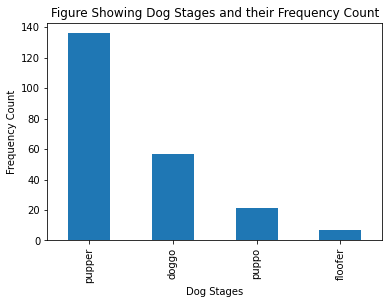

In [87]:
# plot the value counts for the different dog stages
df['dog_stage'].value_counts().plot.bar(xlabel= 'Dog Stages', ylabel= 'Frequency Count',
                                                 title= 'Figure Showing Dog Stages and their Frequency Count');

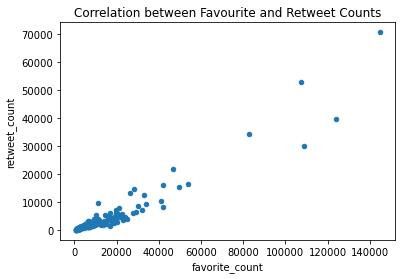

In [88]:
# show the correlation between the retweet and the favorite counts of the original tweets
df.plot(x= 'favorite_count', y= 'retweet_count', 
        title= 'Correlation between Favourite and Retweet Counts', 
        kind= 'scatter');

### Insights:
1. Dogs with the highest number of dog ratings are in pupper dog stage

2. The average favorite count of the original tweets is twice higher than the average retweet count

3. The top three most loved breeds of dogs are Golden Retriever, Labrador Retriever and Pembroke

### Visualization

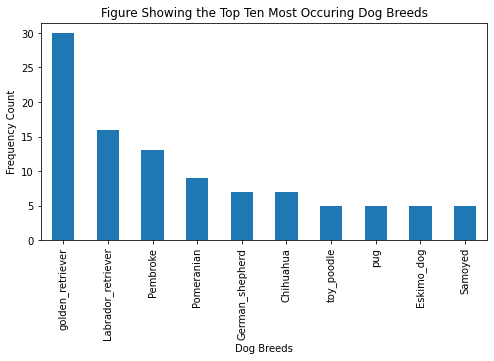

In [90]:
# display the top 10 breeds of dogs that are in p1
df['p1'].value_counts()[:10].plot.bar(xlabel= 'Dog Breeds', ylabel= 'Frequency Count',
                                      title= 'Figure Showing the Top Ten Most Occuring Dog Breeds',
                                              figsize= (8,4));